# Project Description
The following is the code used in the making of a MANU465 Capstone Project for Group 1. The entirety of the code and the data used throughout this project is available at [this github repository](https://github.com/AlbertoMussali-UBC/MANU465_Team1_Project).
## Authors

|       Name      | Student ID |
|:---------------:|:----------:|
|   Anant Goyal   |  46894325  |
| Alberto Mussali |  50684182  |
|    Musa Habib   |  25899808  |
| Sadul Bombuwala |  76343292  |

## Overview
### Motivation
Possibly the most incredible aspect of Machine Learning and Artificial Intelligence is the ability to mimic human-like decision making. Upon learning about how Artificial Neural Networks are constructed and how they work, we were incredibly intrigued by the workings of the neural networks within our brains. We see this project as a means to further study and understand the complexities of our minds. Collecting and analyzing brainwave data is something we have never had the opportunity to do, and we hope that during the course of this project we will gain a valuable understanding of how brainwave data within humans can be used for research in the world of Artificial Intelligence.

### Goals and Objective
**Objective: To be able to use machine learning models to predict whether or not a person is fatigued, based on brainwave data.**

The Muse 2 is a multi-sensor meditation device that provides real-time feedback on brain activity, heart rate, breathing, and body movements to help users build a consistent meditation practice. When paired with the Mind Monitor phone application, one can view and analyze the neural oscillation readings picked up by the Muse 2, and use this headband for purposes beyond mediation.

> [https://choosemuse.com/muse-2/](https://choosemuse.com/muse-2/)  
> [https://mind-monitor.com/](https://mind-monitor.com/)

Our project aims to use these tools to collect data on the variations in brain activity when an individual is in a Sleep-deprived state of mind, and compare this to when they are well rested. Using this data we plan to build a Machine Learning algorithm which accurately predicts the level of sleep deprivation of an individual, based on the brainwave data passed into the algorithm.

## Challenges
It should be noted that due to the small amount of data compiled, all the trained models are observed to overfit the dataset. This can be remedied in the future by taking more data over the span of a longer timeframe (approximately 1 year) for multiple subjects on both states.

# General Setup

## Fix Random State

In [1]:
SEED = 55;

## Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow.keras as kr
import seaborn as sns
import os

# Importing the Raw Data

In [3]:
%%time


# Get Current Working directory and append the data relative dir
cwd = os.getcwd()
notTiredDir = cwd + r"\Data\Raw\NotTired"
tiredDir = cwd + r"\Data\Raw\Tired"

# Hold file locations
filesTired=[];
filesNotTired=[];

#Populate file location arrays
for file in os.listdir(notTiredDir):
    if file.endswith('.csv'):
        filesNotTired.append(os.path.join(notTiredDir, file))
for file in os.listdir(tiredDir):
        if file.endswith('.csv'):
            filesTired.append(os.path.join(tiredDir, file))
            
#Test reading files by changing num
num=6;
sample = pd.read_csv(filesNotTired[num])
sample 

Wall time: 16 ms


,TimeStamp,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,...,Gyro_X,Gyro_Y,Gyro_Z,HeadBandOn,HSI_TP9,HSI_AF7,HSI_AF8,HSI_TP10,Battery,Elements
0,2021-11-01 17:54:38.045,1.110457,-0.382196,0.082630,0.743808,0.455723,-0.523256,0.086015,0.487615,0.493558,...,4.134674,-5.824432,-1.510315,1.0,1.0,2.0,1.0,1.0,70.0,NaN
1,2021-11-01 17:54:39.045,0.904642,-0.382196,0.236881,0.613098,0.313527,-0.523256,0.171247,0.546970,0.538756,...,4.329071,-2.990723,-1.644897,1.0,1.0,2.0,1.0,1.0,70.0,NaN
2,2021-11-01 17:54:39.187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/elements/jaw_clench
3,2021-11-01 17:54:40.045,0.652124,-0.382196,0.462323,0.410327,0.293693,-0.523256,0.267178,0.466408,0.343593,...,5.622559,-5.099182,-0.732727,1.0,1.0,2.0,1.0,1.0,70.0,NaN
4,2021-11-01 17:54:41.043,0.558608,-0.382196,0.502156,0.877835,0.281408,-0.523256,0.337400,0.469669,0.381862,...,4.882355,-3.536530,-1.652374,1.0,1.0,2.0,1.0,1.0,70.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,2021-11-01 17:56:57.042,1.011459,-0.382196,0.502156,0.955036,0.456557,-0.523256,0.337400,0.439388,0.575279,...,5.510406,-7.880554,-2.257996,1.0,1.0,4.0,2.0,1.0,70.0,NaN
157,2021-11-01 17:56:57.111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/elements/blink
158,2021-11-01 17:56:57.852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/elements/blink
159,2021-11-01 17:56:58.042,1.011459,-0.382196,0.502156,0.955036,0.456557,-0.523256,0.337400,0.439388,0.575279,...,4.844971,-6.190796,-2.781372,1.0,1.0,4.0,4.0,1.0,70.0,NaN


In [4]:
#Mini-Summary of Block
print(f"> {len(filesNotTired)} files were added from the NOT TIRED category")
print(f"> {len(filesTired)} files were added from the TIRED category\n")

> 31 files were added from the NOT TIRED category
> 20 files were added from the TIRED category



## Available Features

In [5]:
print("Features generated by the Muse 2 headband:")

pd.DataFrame(sample.columns).T

Features generated by the Muse 2 headband:


,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,TimeStamp,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,...,Gyro_X,Gyro_Y,Gyro_Z,HeadBandOn,HSI_TP9,HSI_AF7,HSI_AF8,HSI_TP10,Battery,Elements


## Raw Data Structure

In [6]:
#quick view of data
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TimeStamp        161 non-null    object 
 1   Delta_TP9        141 non-null    float64
 2   Delta_AF7        141 non-null    float64
 3   Delta_AF8        141 non-null    float64
 4   Delta_TP10       141 non-null    float64
 5   Theta_TP9        141 non-null    float64
 6   Theta_AF7        141 non-null    float64
 7   Theta_AF8        141 non-null    float64
 8   Theta_TP10       141 non-null    float64
 9   Alpha_TP9        141 non-null    float64
 10  Alpha_AF7        141 non-null    float64
 11  Alpha_AF8        141 non-null    float64
 12  Alpha_TP10       141 non-null    float64
 13  Beta_TP9         141 non-null    float64
 14  Beta_AF7         141 non-null    float64
 15  Beta_AF8         141 non-null    float64
 16  Beta_TP10        141 non-null    float64
 17  Gamma_TP9       

# Data Preprocessing

Note: Initial preprocessing here was done to tailor the data so it could be passed to Jordan Bird's function 'EEG_feature_extraction' (https://github.com/AlbertoMussali-UBC/MANU465_Team1_Project)

## Creating the RAW Dataset

In [7]:
%%time
## Extract rows 21-25 from all files,
## these are the only 5 features relevant for use in the EEG_feature_extraction function.

rowsTired=[];
for f in filesTired:
    for r in range(pd.read_csv(f).shape[0]):
        rowsTired.append(pd.read_csv(f).iloc[r,[0, 21,22,23,24,25]])

rowsNotTired=[];
for f in filesNotTired:
    for r in range(pd.read_csv(f).shape[0]):
        rowsNotTired.append(pd.read_csv(f).iloc[r,[0, 21,22,23,24,25]])



Wall time: 15min 5s


In [8]:
#Convert to DataFrames:

data_NT = pd.DataFrame(rowsNotTired);
original_NT = data_NT.copy();
data_NT

,TimeStamp,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,AUX_RIGHT
0,2021-11-01 17:27:27.362,792.967033,811.904762,769.194139,788.937729,680.549451
1,2021-11-01 17:27:28.362,751.465201,770.805861,780.879121,803.846154,799.816850
2,2021-11-01 17:27:29.362,747.435897,827.619048,793.369963,802.234432,906.190476
3,2021-11-01 17:27:30.371,838.901099,803.040293,803.443223,795.787546,817.142857
4,2021-11-01 17:27:31.366,809.890110,780.476190,798.205128,743.406593,785.311355
...,...,...,...,...,...,...
2888,2021-11-27 19:42:02.022,800.219780,804.652015,0.000000,778.864469,1116.923077
2889,2021-11-27 19:42:03.017,799.816850,803.040293,1246.666667,751.868132,1625.018315
2890,2021-11-27 19:42:04.017,759.120879,799.010989,116.446886,828.424908,796.593407
2891,2021-11-27 19:42:05.016,780.879121,815.934066,0.000000,788.937729,628.974359


In [9]:
data_T = pd.DataFrame(rowsTired);
original_T = data_T.copy();
data_T

,TimeStamp,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,AUX_RIGHT
0,2021-11-11 00:54:16.918,782.893773,767.985348,1100.805861,799.413919,732.930403
1,2021-11-11 00:54:17.318,NaN,NaN,NaN,NaN,NaN
2,2021-11-11 00:54:17.920,790.549451,887.655678,1648.791209,809.487179,734.139194
3,2021-11-11 00:54:18.686,NaN,NaN,NaN,NaN,NaN
4,2021-11-11 00:54:18.929,755.494505,0.000000,0.000000,732.124542,565.714286
...,...,...,...,...,...,...
1295,2021-11-27 02:35:30.353,NaN,NaN,NaN,NaN,NaN
1296,2021-11-27 02:35:30.710,801.025641,812.307692,0.000000,802.637363,608.827839
1297,2021-11-27 02:35:30.977,NaN,NaN,NaN,NaN,NaN
1298,2021-11-27 02:35:31.711,808.681319,367.069597,46.336996,785.311355,652.344322


In [10]:
#quick check of DataFrames

print(f"Not Tired Data size is: \t{data_NT.shape}", f"\nTired Data size is: \t\t{data_T.shape}")

Not Tired Data size is: 	(31213, 6) 
Tired Data size is: 		(26394, 6)


## Remove Empty Rows

Remove NaN values associated with blinking and jaw clenching

In [11]:
data_T = data_T.dropna()

In [12]:
data_NT = data_NT.dropna()

## Convert Datetime Column to Timestamps
Required for compatibility with EEG_feature_extraction function

In [13]:
from datetime import datetime

ind = 0;
for time in data_T.iloc[:, 0]:
    tmstmp = datetime.strptime(str(time), '%Y-%m-%d %H:%M:%S.%f').timestamp()
    data_T.iat[ind, 0] = (tmstmp);
    ind=ind+1;
    
ind = 0;
for time in data_NT.iloc[:, 0]:
    tmstmp = datetime.strptime(str(time), '%Y-%m-%d %H:%M:%S.%f').timestamp()
    data_NT.iat[ind, 0] = (tmstmp);
    ind=ind+1;



In [14]:
#quick check 
data_NT.head()

,TimeStamp,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,AUX_RIGHT
0,1635812847.362,792.967033,811.904762,769.194139,788.937729,680.549451
1,1635812848.362,751.465201,770.805861,780.879121,803.846154,799.816850
2,1635812849.362,747.435897,827.619048,793.369963,802.234432,906.190476
3,1635812850.371,838.901099,803.040293,803.443223,795.787546,817.142857
4,1635812851.366,809.890110,780.476190,798.205128,743.406593,785.311355


## Save Data to File

**Alternative STARTING POINT once data collection is finalized**

Note: this step was done to skip Section 3.1 which would take very long to run each time

In [15]:
savelocT = cwd + r"\Data\Preprocessed\Tired.csv"
savelocNT = cwd + r"\Data\Preprocessed\NotTired.csv"

if os.path.exists(savelocT):
    os.remove(savelocT)
    
if os.path.exists(savelocNT):
    os.remove(savelocNT)

data_T.to_csv(savelocT,  mode='w', index = False)
data_NT.to_csv(savelocNT,mode='w', index = False)


## EEG Feature Generation
Execution of the function

In [16]:
from eegFG import EEG_feature_extraction as FG

#tried various combinations of Nsamp and Perio
#This combination was optimal
Nsamp = 50;
Perio = 6;

xT, yT = FG.generate_feature_vectors_from_samples(file_path=savelocT,
                                         nsamples=Nsamp, 
                                         period=Perio,
                                         #state=data_NT.iloc[:,-1],
                                         slide_percent=0.05,
                                         remove_redundant=False, 
                                         cols_to_ignore=None)
xT.shape

(119, 810)

In [17]:
Nsamp = 50;
Perio = 5;

xNT, yNT = FG.generate_feature_vectors_from_samples(file_path=savelocNT,
                                         nsamples=Nsamp, 
                                         period=Perio,
                                         #state=data_NT.iloc[:,-1],
                                         slide_percent=0.06,
                                         remove_redundant=False, 
                                         cols_to_ignore=None)
xNT.shape

(219, 810)

> **The following code was used to optimize feature generation in Jordan Bird's method and can be ignored for now**

> ```python
> 
> %%time
> 
> from importlib import reload
> 
> flaggity=False
> 
> tmp_results=[]
> thresh = 95;
> for ns in range(50,256,1):
>     if (flaggity==True):
>         break;
>     for p in range(3,8):
>         
>         try:
>             reload(FG);
>             xT, yT = FG.generate_feature_vectors_from_samples(file_path=savelocT,
>                                  nsamples=ns, 
>                                  period=p,
>                                  #state=data_NT.iloc[:,-1],
>                                  slide_percent=0.01,
>                                  remove_redundant=False, 
>                                  cols_to_ignore=None)
>             
>             xNT, yNT = FG.generate_feature_vectors_from_samples(file_path=savelocNT,
>                                  nsamples=ns, 
>                                  period=p,
>                                  #state=data_NT.iloc[:,-1],
>                                  slide_percent=0.01,
>                                  remove_redundant=False, 
>                                  cols_to_ignore=None)
>         
>         except (UnboundLocalError):
>             continue;
>             
>         
>         if (xNT.shape[1] == xT.shape[1]):
>             print('Cols match!', xT.shape, xNT.shape)
>             if (xNT.shape[0] >= thresh and xT.shape[0] >= thresh):
>                 print('Thresh met.')
>                 tmp_results.append((ns,p,xNT.shape[0],xT.shape[0],xNT.shape[1]))
>                 flaggity=True;
>                 break;
>                 
>                 
> tmp_results
> 
> ```

In [18]:
#some quick checks

X_NT = pd.DataFrame(np.real(xNT))
X_NT.columns = np.hstack((['TimeStamp'], yNT))
X_NT.describe()

,TimeStamp,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_4,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,...,freq_156_4,freq_167_4,freq_177_4,freq_188_4,freq_198_4,freq_208_4,freq_219_4,freq_229_4,freq_240_4,freq_250_4
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02
mean,779.105307,790.250350,793.258774,774.799042,826.072764,0.795194,-0.121172,0.069205,-2.103254,-0.647116,...,1.883061e-16,1.745045e-16,1.544986e-16,1.448308e-16,1.547404e-16,1.846458e-16,1.476364e-16,1.515523e-16,1.510991e-16,1.629086e-16
std,13.221727,13.962959,10.783482,15.090785,48.215973,29.464956,27.057741,19.906972,39.864481,103.172259,...,1.326495e-16,1.444510e-16,1.269430e-16,1.087036e-16,1.012431e-16,1.309267e-16,1.119076e-16,1.210018e-16,1.094171e-16,1.336611e-16
min,742.197802,753.641026,778.260073,731.721612,730.996337,-88.384188,-79.917043,-84.016933,-130.084391,-210.246429,...,1.682008e-17,6.015924e-18,1.900429e-17,7.931615e-18,2.128355e-17,1.518165e-17,1.188983e-17,1.419177e-17,0.000000e+00,0.000000e+00
25%,773.142857,786.197802,785.391941,770.543956,795.304029,-20.452674,-10.171238,-8.063057,-17.210459,-56.006977,...,9.230115e-17,7.334713e-17,7.405775e-17,7.082150e-17,7.602051e-17,9.593048e-17,6.260944e-17,6.938637e-17,7.105427e-17,7.944109e-17
50%,780.717949,793.531136,791.194139,776.608059,825.362637,0.764957,3.152271,1.392108,0.776751,-7.501446,...,1.491212e-16,1.309328e-16,1.194447e-16,1.221453e-16,1.237816e-16,1.576475e-16,1.158174e-16,1.165273e-16,1.280949e-16,1.137423e-16
75%,790.065934,797.560440,797.399267,784.102564,849.296703,18.143992,11.409339,11.061487,15.138016,66.080933,...,2.449648e-16,2.106828e-16,1.944893e-16,1.750761e-16,2.196927e-16,2.355246e-16,2.025191e-16,1.702570e-16,2.139017e-16,1.913195e-16
max,797.479853,813.838828,826.329670,816.578755,970.981685,81.924841,93.667981,65.789165,145.152860,389.591801,...,6.238957e-16,6.452308e-16,7.038281e-16,6.440853e-16,4.659868e-16,9.722256e-16,4.971045e-16,6.153708e-16,5.329071e-16,6.787450e-16


In [19]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(pd.DataFrame(pd.DataFrame(X_NT).head()))

,TimeStamp,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_4,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_d_h2h1_4,lag1_mean_q1_0,lag1_mean_q1_1,lag1_mean_q1_2,lag1_mean_q1_3,lag1_mean_q1_4,lag1_mean_q2_0,lag1_mean_q2_1,lag1_mean_q2_2,lag1_mean_q2_3,lag1_mean_q2_4,lag1_mean_q3_0,lag1_mean_q3_1,lag1_mean_q3_2,lag1_mean_q3_3,lag1_mean_q3_4,lag1_mean_q4_0,lag1_mean_q4_1,lag1_mean_q4_2,lag1_mean_q4_3,lag1_mean_q4_4,lag1_mean_d_q1q2_0,lag1_mean_d_q1q2_1,lag1_mean_d_q1q2_2,lag1_mean_d_q1q2_3,lag1_mean_d_q1q2_4,lag1_mean_d_q1q3_0,lag1_mean_d_q1q3_1,lag1_mean_d_q1q3_2,lag1_mean_d_q1q3_3,lag1_mean_d_q1q3_4,lag1_mean_d_q1q4_0,lag1_mean_d_q1q4_1,lag1_mean_d_q1q4_2,lag1_mean_d_q1q4_3,lag1_mean_d_q1q4_4,lag1_mean_d_q2q3_0,lag1_mean_d_q2q3_1,lag1_mean_d_q2q3_2,lag1_mean_d_q2q3_3,lag1_mean_d_q2q3_4,lag1_mean_d_q2q4_0,lag1_mean_d_q2q4_1,lag1_mean_d_q2q4_2,lag1_mean_d_q2q4_3,lag1_mean_d_q2q4_4,lag1_mean_d_q3q4_0,lag1_mean_d_q3q4_1,lag1_mean_d_q3q4_2,lag1_mean_d_q3q4_3,lag1_mean_d_q3q4_4,lag1_std_0,lag1_std_1,lag1_std_2,lag1_std_3,lag1_std_4,lag1_std_d_h2h1_0,lag1_std_d_h2h1_1,lag1_std_d_h2h1_2,lag1_std_d_h2h1_3,lag1_std_d_h2h1_4,lag1_skew_0,lag1_skew_1,lag1_skew_2,lag1_skew_3,lag1_skew_4,lag1_kurt_0,lag1_kurt_1,lag1_kurt_2,lag1_kurt_3,lag1_kurt_4,lag1_max_0,lag1_max_1,lag1_max_2,lag1_max_3,lag1_max_4,lag1_max_d_h2h1_0,lag1_max_d_h2h1_1,lag1_max_d_h2h1_2,lag1_max_d_h2h1_3,lag1_max_d_h2h1_4,lag1_max_q1_0,lag1_max_q1_1,lag1_max_q1_2,lag1_max_q1_3,lag1_max_q1_4,lag1_max_q2_0,lag1_max_q2_1,lag1_max_q2_2,lag1_max_q2_3,lag1_max_q2_4,lag1_max_q3_0,lag1_max_q3_1,lag1_max_q3_2,lag1_max_q3_3,lag1_max_q3_4,lag1_max_q4_0,lag1_max_q4_1,lag1_max_q4_2,lag1_max_q4_3,lag1_max_q4_4,lag1_max_d_q1q2_0,lag1_max_d_q1q2_1,lag1_max_d_q1q2_2,lag1_max_d_q1q2_3,lag1_max_d_q1q2_4,lag1_max_d_q1q3_0,lag1_max_d_q1q3_1,lag1_max_d_q1q3_2,lag1_max_d_q1q3_3,lag1_max_d_q1q3_4,lag1_max_d_q1q4_0,lag1_max_d_q1q4_1,lag1_max_d_q1q4_2,lag1_max_d_q1q4_3,lag1_max_d_q1q4_4,lag1_max_d_q2q3_0,lag1_max_d_q2q3_1,lag1_max_d_q2q3_2,lag1_max_d_q2q3_3,lag1_max_d_q2q3_4,lag1_max_d_q2q4_0,lag1_max_d_q2q4_1,lag1_max_d_q2q4_2,lag1_max_d_q2q4_3,lag1_max_d_q2q4_4,lag1_max_d_q3q4_0,lag1_max_d_q3q4_1,lag1_max_d_q3q4_2,lag1_max_d_q3q4_3,lag1_max_d_q3q4_4,lag1_min_0,lag1_min_1,lag1_min_2,lag1_min_3,lag1_min_4,lag1_min_d_h2h1_0,lag1_min_d_h2h1_1,lag1_min_d_h2h1_2,lag1_min_d_h2h1_3,lag1_min_d_h2h1_4,lag1_min_q1_0,lag1_min_q1_1,lag1_min_q1_2,lag1_min_q1_3,lag1_min_q1_4,lag1_min_q2_0,lag1_min_q2_1,lag1_min_q2_2,lag1_min_q2_3,lag1_min_q2_4,lag1_min_q3_0,lag1_min_q3_1,lag1_min_q3_2,lag1_min_q3_3,lag1_min_q3_4,lag1_min_q4_0,lag1_min_q4_1,lag1_min_q4_2,lag1_min_q4_3,lag1_min_q4_4,lag1_min_d_q1q2_0,lag1_min_d_q1q2_1,lag1_min_d_q1q2_2,lag1_min_d_q1q2_3,lag1_min_d_q1q2_4,lag1_min_d_q1q3_0,lag1_min_d_q1q3_1,lag1_min_d_q1q3_2,lag1_min_d_q1q3_3,lag1_min_d_q1q3_4,lag1_min_d_q1q4_0,lag1_min_d_q1q4_1,lag1_min_d_q1q4_2,lag1_min_d_q1q4_3,lag1_min_d_q1q4_4,lag1_min_d_q2q3_0,lag1_min_d_q2q3_1,lag1_min_d_q2q3_2,lag1_min_d_q2q3_3,lag1_min_d_q2q3_4,lag1_min_d_q2q4_0,lag1_min_d_q2q4_1,lag1_min_d_q2q4_2,lag1_min_d_q2q4_3,lag1_min_d_q2q4_4,lag1_min_d_q3q4_0,lag1_min_d_q3q4_1,lag1_min_d_q3q4_2,lag1_min_d_q3q4_3,lag1_min_d_q3q4_4,lag1_covM_0_0,lag1_covM_0_1,lag1_covM_0_2,lag1_covM_0_3,lag1_covM_0_4,lag1_covM_1_1,lag1_covM_1_2,lag1_covM_1_3,lag1_covM_1_4,lag1_covM_2_2,lag1_covM_2_3,lag1_covM_2_4,lag1_covM_3_3,lag1_covM_3_4,lag1_covM_4_4,lag1_eigenval_0,lag1_eigenval_1,lag1_eigenval_2,lag1_eigenval_3,lag1_eigenval_4,lag1_logcovM_0_0,lag1_logcovM_0_1,lag1_logcovM_0_2,lag1_logcovM_0_3,lag1_logcovM_0_4,lag1_logcovM_1_1,lag1_logcovM_1_2,lag1_logcovM_1_3,lag1_logcovM_1_4,lag1_logcovM_2_2,lag1_logcovM_2_3,lag1_logcovM_2_4,lag1_logcovM_3_3,lag1_logcovM_3_4,lag1_logcovM_4_4,lag1_topFreq_1_0,lag1_topFreq_2_0,lag1_topFreq_3_0,lag1_topFreq_4_0,lag1_topFreq_5_0,lag1_topFreq_6_0,lag1_topFreq_7_0,lag1_topFreq_8_0,lag1_topFreq_9_0,lag1_topFreq_10_0,lag1_topFreq_1_1,lag1_topFreq_2_1,lag1_topFreq_3_1,la

In [20]:
X_T = pd.DataFrame(np.real(xT))
X_T.columns = np.hstack((['TimeStamp'], yT))
X_T.describe()

,TimeStamp,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_4,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,...,freq_156_4,freq_167_4,freq_177_4,freq_188_4,freq_198_4,freq_208_4,freq_219_4,freq_229_4,freq_240_4,freq_250_4
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,...,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02
mean,853.022850,742.893619,911.472025,844.334452,784.668021,1.439227,-0.123772,-0.581400,4.849069,7.663767,...,4.706894e-17,3.404702e-17,3.489199e-17,3.983879e-17,4.338665e-17,4.854704e-17,4.007357e-17,4.649238e-17,4.644427e-17,4.273157e-17
std,118.126749,251.525994,217.512393,104.498981,33.160809,254.559496,381.727887,256.604333,246.614039,87.697119,...,3.940232e-17,2.291741e-17,2.453074e-17,3.198417e-17,2.243436e-17,2.956604e-17,2.879612e-17,4.108687e-17,3.984125e-17,2.391119e-17
min,732.796093,350.818071,532.069597,664.499389,705.665446,-628.239954,-655.880639,-731.972815,-460.710955,-218.204290,...,4.615758e-18,2.759144e-18,2.022967e-18,2.964421e-20,1.887122e-18,6.518450e-18,4.611536e-18,8.939066e-18,2.359224e-18,0.000000e+00
25%,765.869963,558.797314,777.084860,784.841270,770.570818,-34.380751,-320.332371,-73.953916,-43.008357,-37.787215,...,1.936982e-17,1.839066e-17,1.849984e-17,1.699074e-17,2.899532e-17,2.796610e-17,1.803535e-17,2.468225e-17,2.512148e-17,2.047150e-17
50%,805.189255,626.153846,882.954823,803.308913,794.645910,-0.355619,88.870928,7.618361,-12.709321,8.080558,...,3.816092e-17,2.602471e-17,2.690037e-17,2.963807e-17,3.860086e-17,3.544832e-17,3.376057e-17,3.576977e-17,4.189529e-17,4.213000e-17
75%,934.731380,967.301587,950.042735,876.507937,810.024420,30.105383,252.124660,124.322869,29.953412,45.431320,...,5.551883e-17,4.130061e-17,4.432209e-17,5.452344e-17,6.176773e-17,7.378400e-17,6.070668e-17,5.785969e-17,5.617334e-17,6.525182e-17
max,1152.985348,1349.884005,1541.947497,1150.097680,823.656899,717.580021,901.701208,607.799946,898.762093,231.658823,...,1.747216e-16,8.929123e-17,1.135637e-16,1.274392e-16,9.698879e-17,1.268587e-16,1.192844e-16,2.085431e-16,2.197232e-16,8.815618e-17


In [21]:
# Drop TimeStamps as they are not needed anymore

X_T=X_T.iloc[:,1:];
X_NT=X_NT.iloc[:,1:];

## Attach Labels for Each Class

In [22]:
#Stack ones or zeros for each class [0 = NotTired, 1 = Tired]
X_T = pd.DataFrame(np.hstack((X_T.to_numpy(),   np.ones((X_T.shape[0], 1)))))
X_NT= pd.DataFrame(np.hstack((X_NT.to_numpy(), np.zeros((X_NT.shape[0], 1)))))

In [23]:
#Add label heading
X_T.columns  = np.hstack((yT, ['Target']))
X_NT.columns = np.hstack((yNT, ['Target']))

## Check Column Coherency

In [24]:
#Ensure Data is Coherent (same number of columns for X_T and X_NT)

print(X_T.shape[1], X_NT.shape[1])

if (X_T.shape[1] == X_NT.shape[1]):
    dataset = np.vstack((X_T, X_NT))
    dataset = pd.DataFrame(dataset)
    print('Columns are coherent')
else:
    print('NOT COHERENT')


810 810
Columns are coherent


## Randomize the Dataset

In [25]:
dataset.columns = np.hstack((yT, ['Target']))
dataset = dataset.sample(frac = 1).reset_index(drop=True)
dataset.head()

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_4,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_d_h2h1_4,...,freq_167_4,freq_177_4,freq_188_4,freq_198_4,freq_208_4,freq_219_4,freq_229_4,freq_240_4,freq_250_4,Target
0,796.109890,798.285714,782.410256,838.014652,46.848403,12.418692,-23.736307,-5.824726,87.503891,756.889543,...,1.072853e-16,2.590975e-17,1.501115e-16,2.020176e-16,1.079965e-16,6.068239e-17,2.430646e-16,1.776357e-16,1.065814e-16,0.0
1,794.739927,781.523810,770.886447,798.285714,-11.325690,-20.580290,1.392108,5.050228,42.872301,785.443682,...,3.838768e-16,3.303850e-16,1.682496e-16,8.939096e-17,3.708276e-16,3.977741e-16,6.153708e-16,3.014578e-16,2.864289e-16,0.0
2,786.761905,801.025641,737.604396,887.736264,43.895367,56.602530,-15.505012,-29.867531,-112.099511,811.851852,...,1.545342e-16,5.686318e-17,9.032394e-17,5.855013e-17,1.576475e-16,6.048789e-17,1.134774e-16,1.103095e-16,1.588822e-16,0.0
3,793.369963,787.245421,789.340659,836.967033,6.148547,5.800402,4.466328,20.427549,-13.883131,786.705512,...,4.893506e-16,5.365233e-17,3.584996e-16,2.813814e-16,3.008096e-16,2.906827e-16,3.820523e-16,1.280949e-16,2.364957e-16,0.0
4,770.644689,822.622711,761.296703,756.622711,-55.367517,-47.030048,39.658009,-130.084391,-191.522526,761.347473,...,8.236001e-17,2.596011e-17,3.204291e-17,2.498363e-17,4.081299e-17,5.845470e-17,2.154702e-17,1.776357e-17,7.324107e-17,0.0


## Separating Input and Output

In [26]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

#Y labeled for plotting or result check
def label(n):
    if (n==0):
        return 'Not Tired'
    return 'Tired'

y_labeled = list(map(label, y));

## Splitting Dataset into the Training and Test Sets

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = SEED)

## Feature Scaling
Note for future: see if this step is not needed as we rescale the PCs anyway

In [28]:
from sklearn.preprocessing import StandardScaler
scX = StandardScaler();
scX.fit(X_train); #Fit to training data only
x = scX.transform(x)

In [29]:
#quick view of scaled data
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,799,800,801,802,803,804,805,806,807,808
0,0.152249,-0.261045,-0.258016,0.535385,0.263150,0.059903,-0.140409,-0.049241,0.915919,-0.365244,...,0.208268,-0.109611,-0.729805,0.461471,0.882625,-0.227965,-0.466960,1.102982,0.634559,-0.095081
1,0.143130,-0.378017,-0.416003,-0.281708,-0.104084,-0.084495,0.016555,0.020376,0.450715,-0.171376,...,3.786882,1.978886,1.784520,0.648103,-0.277648,1.789920,2.776479,4.297653,1.855843,1.439141
2,0.090031,-0.241925,-0.872286,1.557996,0.244509,0.253245,-0.088993,-0.203154,-1.164588,0.007921,...,-0.075055,0.247158,-0.474195,-0.153711,-0.595368,0.153230,-0.468831,-0.008975,-0.029494,0.351081
3,0.134012,-0.338089,-0.163003,0.513839,0.006225,0.030942,0.035758,0.118816,-0.140858,-0.162809,...,1.599495,2.775301,-0.500710,2.605674,1.700225,1.252357,1.746064,2.295602,0.145928,1.013177
4,-0.017241,-0.091212,-0.547474,-1.138579,-0.382105,-0.200236,0.255581,-0.844705,-1.992430,-0.334977,...,-0.580739,-0.297818,-0.729389,-0.753392,-0.941168,-0.743767,-0.488394,-0.797808,-0.942294,-0.379497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,2.036304,3.039935,-0.201671,-0.544405,0.664601,-2.356708,-0.712618,0.207210,0.555963,-0.779043,...,-1.025376,-0.823090,-0.692996,-0.800165,-0.887767,-0.807406,-0.948043,-0.861059,-0.823671,-0.764695
334,0.121140,-0.397137,-0.377335,-0.972840,0.187052,0.055486,-0.000495,-0.029690,-1.693337,-0.473052,...,1.418052,-0.365873,-0.110472,0.870004,0.429423,0.424039,-0.516560,-0.037431,-0.241471,-1.004293
335,-0.003296,-0.065343,-0.517645,-1.665630,-0.590529,-0.234137,0.418808,-0.346840,-2.187593,0.326269,...,-0.580739,-0.297818,-0.729389,-0.753392,-0.941168,-0.743767,-0.488394,-0.797808,-0.942294,-0.379497
336,0.270248,-0.289164,-0.403850,0.366331,-0.086712,0.160995,0.040968,0.363213,-0.076785,-0.175701,...,0.504978,1.241990,-0.430294,1.314157,3.602019,1.537018,0.176349,-0.707819,1.166905,-0.345653


# Principal Component Analysis
## Calculate Principal Components

In [30]:
from sklearn.decomposition import PCA

information = 225; #15^2=225;
PrinCom=PCA(n_components=information, random_state = SEED)
PrinCom.fit(X_train)

#save as new variable for PCs so as to not tamper with old variable
Z_train = PrinCom.transform(X_train);
Z_test  = PrinCom.transform(X_test);
Z       = PrinCom.transform(x)

print('Train set shape = ',Z_train.shape, '\nTest set shape  = ',Z_test.shape)


pd.DataFrame(Z).describe() #Data No longer Standard
print(f"Using the first {Z.shape[1]} Principal Components describes {np.round(PrinCom.explained_variance_ratio_.sum() * 100,5)}% of the data.")
pd.DataFrame(Z)

Train set shape =  (270, 225) 
Test set shape  =  (68, 225)
Using the first 225 Principal Components describes 100.0% of the data.


,0,1,2,3,4,5,6,7,8,9,...,215,216,217,218,219,220,221,222,223,224
0,-188799.714527,-23073.518325,-9801.856529,9566.113542,-14332.068735,-23187.043665,2995.226434,-1386.114505,-3396.073323,-5915.612791,...,58.008605,-22.500642,14.134517,-51.842265,16.404972,43.514793,45.895423,-102.513540,-48.179343,-26.759178
1,-188799.762822,-23073.511101,-9801.836145,9566.094555,-14331.974606,-23187.555427,2995.211264,-1385.872033,-3396.202215,-5915.717482,...,58.305622,-22.239008,13.246686,-51.793494,17.019124,43.237452,45.212404,-102.067086,-47.671114,-26.355697
2,-188799.538669,-23073.571970,-9801.963634,9566.308546,-14332.134694,-23186.135988,2995.084943,-1385.992396,-3395.312072,-5914.853783,...,57.417844,-21.651574,13.566636,-52.422736,16.753365,42.824017,46.570124,-102.104428,-48.088343,-26.510351
3,-188799.763902,-23073.506342,-9801.835448,9566.090586,-14331.999563,-23187.476976,2995.212687,-1385.890715,-3396.137747,-5915.701104,...,57.370930,-22.234063,13.660905,-52.269324,15.547482,43.541083,45.095975,-102.103951,-48.491929,-27.250918
4,-188799.012054,-23073.602369,-9802.169941,9566.541268,-14332.831484,-23180.039102,2995.548317,-1389.757445,-3396.123283,-5914.309797,...,57.077416,-21.815543,13.564303,-52.302047,16.704752,42.495334,46.129236,-102.203238,-48.776627,-27.258845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,-188789.845100,-23064.588811,-9804.542697,9569.568994,-14333.395024,-23188.534687,2995.778737,-1387.696793,-3392.594902,-5919.826044,...,57.394952,-23.197776,14.007236,-53.153659,15.704590,43.482216,46.258566,-101.497843,-47.886581,-26.263146
334,-188799.688663,-23073.579169,-9801.823081,9566.098257,-14332.109641,-23186.989600,2995.149934,-1385.836490,-3395.773882,-5915.331444,...,58.644526,-22.410524,14.156527,-52.072816,16.844136,43.669199,45.044647,-102.021330,-48.553602,-26.531221
335,-188799.024606,-23073.593786,-9802.170699,9566.550611,-14332.782422,-23180.225029,2995.545433,-1389.684965,-3396.304350,-5914.563509,...,57.083651,-22.308397,13.493156,-52.371596,16.827359,42.341423,45.835449,-101.985911,-48.899057,-27.025837
336,-188799.701441,-23073.536908,-9801.860717,9566.113083,-14331.995001,-23187.420330,2995.217597,-1385.927799,-3396.125835,-5915.805956,...,58.716417,-22.842656,13.477191,-51.782150,16.006434,44.126059,44.654977,-102.511546,-48.026332,-26.678731


## Scaling the Principal Components

In [31]:
## Ignore for now - Ask Ahmad later [Al&Mus]
# scZ = StandardScaler();
# scZ.fit(Z_train);
# Z = scZ.transform(Z)
# Z_train = scZ.transform(Z_train)
# Z_test = scZ.transform(Z_test)
# pd.DataFrame(Z).head()

scZ = StandardScaler();
scZ.fit(Z);
Z = scZ.transform(Z)
pd.DataFrame(Z).head()

,0,1,2,3,4,5,6,7,8,9,...,215,216,217,218,219,220,221,222,223,224
0,-0.417982,0.031656,0.230817,-0.228082,-0.306366,-0.006241,0.049221,0.134513,-0.322128,-0.241898,...,0.081648,-0.047368,0.343800,0.373938,0.239007,0.144400,0.947558,-1.261484,0.266405,0.193183
1,-0.431762,0.034535,0.248130,-0.244527,-0.192686,-0.261985,0.024957,0.307369,-0.408121,-0.324876,...,0.609795,0.488454,-0.975473,0.467712,1.398673,-0.365484,-0.087827,-0.279458,1.411050,0.941707
2,-0.367806,0.010274,0.139843,-0.059181,-0.386026,0.447356,-0.177100,0.221564,0.185753,0.359695,...,-0.968826,1.691505,-0.500044,-0.742176,0.896858,-1.125573,1.970334,-0.361597,0.471358,0.654797
3,-0.432070,0.036432,0.248722,-0.247965,-0.222827,-0.222781,0.027233,0.294052,-0.365110,-0.311895,...,-1.052246,0.498581,-0.359964,-0.447200,-1.380140,0.192733,-0.264322,-0.360546,-0.437607,-0.719077
4,-0.217551,-0.001842,-0.035391,0.142390,-1.227541,3.494176,0.564089,-2.462506,-0.355460,0.790861,...,-1.574164,1.355700,-0.503509,-0.510119,0.805065,-1.729848,1.301994,-0.578941,-1.078810,-0.733783


# Image Creation

## Rescaling and Reshaping

In [32]:
## Scale all the PCA components on 0-256 (image greyscale range)


def gen_images(data):
    images=[];
    for r in range(0,data.shape[0]): #Cycle over rows
        pixels=[];
        mini=min(data[r,:])
        maxi=max(data[r,:])
        m = (maxi-mini)/(256);

        for c in range(0,225): #Cycle over cols
            curPixel = data[r,c]
            pixels.append((((curPixel - mini) / (maxi - mini)) * 255.9).astype(np.uint8))

        #once cols are done running add the image to the images[] array
        img = np.reshape(pixels, (15,15)); #reshape into a square image
        images.append(img)
        
    return images;
   
#Generate images from each data split 
all_images  = gen_images(Z)
x_train_img = gen_images(Z_train)
x_test_img  = gen_images(Z_test)

#Get number of rows in each data split
height_total = Z.shape[0];
height_train = Z_train.shape[0];
height_test =  Z_test.shape[0];

#Reshape into input shape for CNN models
#15,15,1 indicates a 15x15 pixel greyscale image
x_train_img = np.array(x_train_img).reshape(height_train,15,15,1)
x_test_img  = np.array(x_test_img).reshape(height_test,15,15,1)
all_images  = np.array(all_images).reshape(height_total,15,15,1)

## Saving Images

In [33]:
import imageio

# Relative paths to saved folders
TiredImgFolder = cwd + r"\Data\GeneratedImages\Tired"
NotTiredImgFolder = cwd + r"\Data\GeneratedImages\Not Tired"

# Clear the folders
import glob

files = glob.glob(TiredImgFolder + r"\*")
for f in files:
    os.remove(f)

files = glob.glob(NotTiredImgFolder + r"\*")
for f in files:
    os.remove(f)   


ctr1=0;
ctr2=0;
for img in all_images.reshape(height_total,15,15):
    
    if (y[ctr1+ctr2] == 0): #Not Tired
        fstr = NotTiredImgFolder + r"\img_" + str(ctr1) + r".png"
        imageio.imwrite(fstr, img[:, :], dpi=(300,300))
        ctr1+=1; #Counter
    else:
        fstr = TiredImgFolder + r"\img_" + str(ctr2) + r".png"
        imageio.imwrite(fstr, img[:, :], dpi=(300,300))
        ctr2+=1;

## Image Feature Generation

### Datagen Definitions
Generate image data for each of the images - allows us to generate more images to increase input to CNN

In [34]:
from keras.preprocessing.image import ImageDataGenerator

#rpath to IMageFolder
genimgsPath = cwd + r"\Data\GeneratedImages"

r  = 1       #rescale
sr = 0.2     #shear range
zr = 0.2     #zoom range
hf = False   #horizontal flip

ValidationSplit = 0.2

imageGenerator = ImageDataGenerator(rescale = r,
                                   shear_range = sr,
                                   zoom_range = zr,
                                   horizontal_flip = hf,
                                   validation_split=ValidationSplit)

### Generating Features

In [35]:
imgs_train = imageGenerator.flow_from_directory(genimgsPath,
                                                target_size = (15, 15),
                                                batch_size = 32,
                                                subset="training",        #creates training subset
                                                class_mode='categorical',
                                                shuffle=True,
                                                color_mode="grayscale")

imgs_test = imageGenerator.flow_from_directory(genimgsPath,
                                               target_size = (15, 15),
                                               batch_size = 32,
                                               subset="validation",       #creates test subset
                                               class_mode='categorical',
                                               shuffle=True,
                                               color_mode="grayscale")
print(imgs_test.class_indices)

Found 272 images belonging to 2 classes.
Found 66 images belonging to 2 classes.
{'Not Tired': 0, 'Tired': 1}


## Image Examples

This image is for the: "Tired" class.


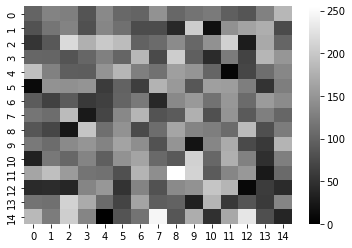

In [62]:
#change n to see a different data image
n = 104
sns.heatmap(all_images.reshape(height_total,15,15)[n], cmap='gray');
print(f'This image is for the: \"{y_labeled[n]}\" class.')

This image is for the: "Not Tired" class.


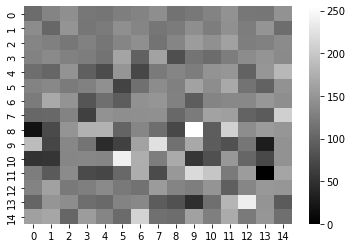

In [37]:
#nth row of data
n=252
sns.heatmap(all_images.reshape(height_total,15,15)[n], cmap='gray');
print(f'This image is for the: \"{y_labeled[n]}\" class.')

# Data Exploration

## General Correlation Matrix for Principal Components

<Figure size 1800x1200 with 0 Axes>

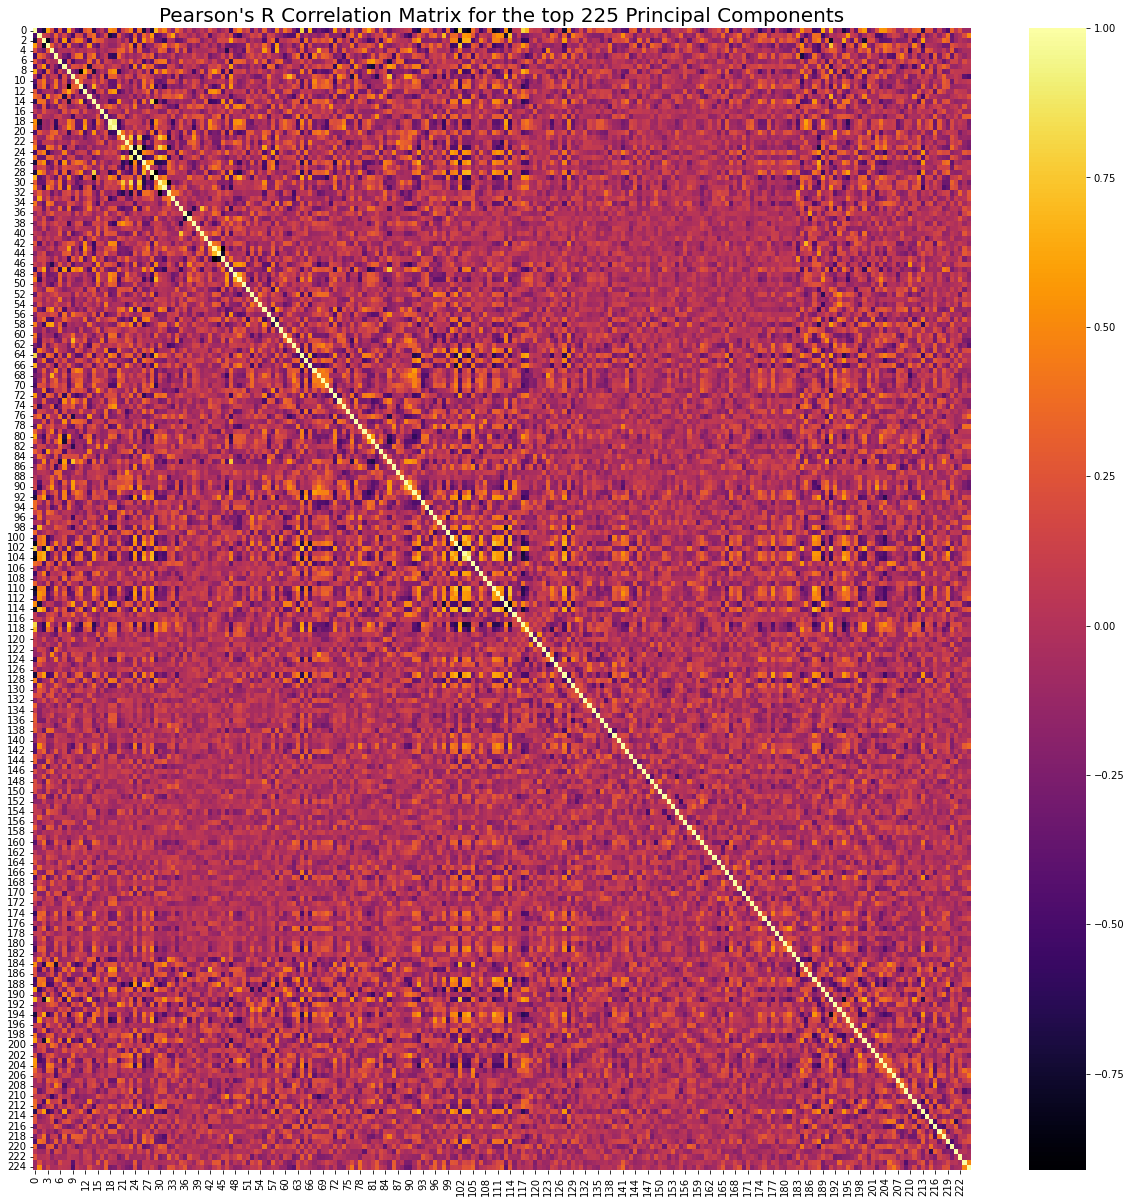

In [38]:
corr_mat = pd.DataFrame(Z).corr(method='pearson');
#mask = np.triu(np.ones_like(corr_mat, dtype=bool));
plt.figure(dpi=300);
plt.subplots(figsize=(21,21));
plt.title("Pearson's R Correlation Matrix for the top 225 Principal Components", fontsize=20);
sns.heatmap(corr_mat, annot=False, lw=0, linecolor='white', cmap='inferno');
#print('Too many features to visualize at once!')

<Figure size 1800x1200 with 0 Axes>

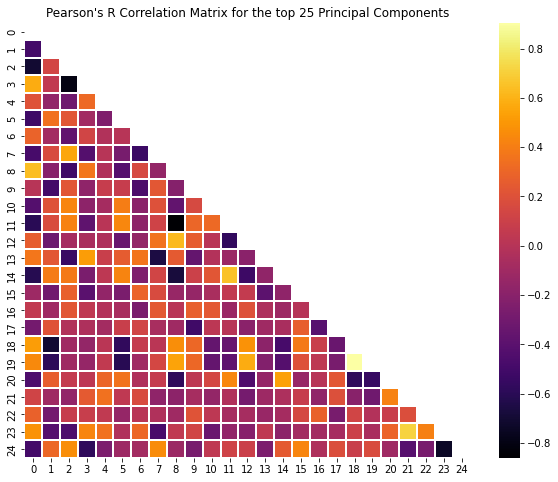

In [39]:
corr_mat = pd.DataFrame(Z[:,0:25]).corr(method='pearson');
mask = np.triu(np.ones_like(corr_mat, dtype=bool));
plt.figure(dpi=300);
plt.subplots(figsize=(10,8));
plt.title("Pearson's R Correlation Matrix for the top 25 Principal Components", fontsize=12);
sns.heatmap(corr_mat, annot=False, lw=0.2, linecolor='white', cmap='inferno', mask=mask);
#print('Too many features to visualize at once!')

## Plotting the Principal Components

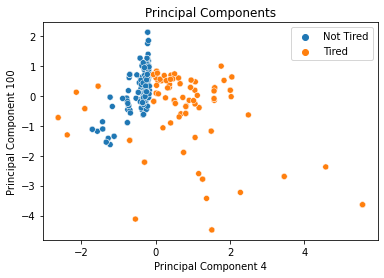

In [40]:
p1=4;
p2=100;
ax1 = sns.scatterplot(x=Z[:,p1], y=Z[:,p2], hue=y_labeled);
ax1.set(title='Principal Components',
        ylabel=f'Principal Component {p2}',
        xlabel=f'Principal Component {p1}');

## PC Distributions

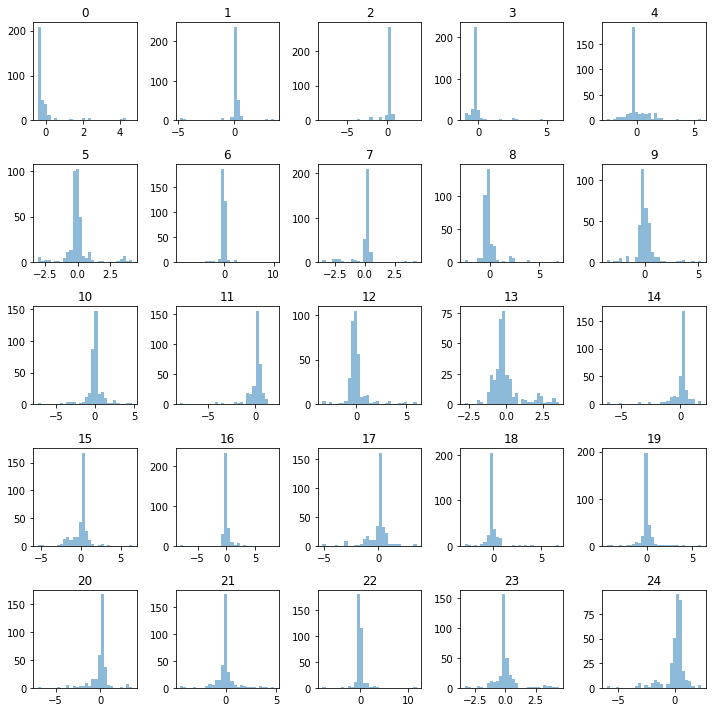

In [41]:
pc_title=[];
for i in range(1,25):
    pc_title.append(f'Principal Component {i}');

Z25 = Z[:,0:25]  

import warnings
warnings.filterwarnings('ignore')
with warnings.catch_warnings():      #Catch warnings in code section
    warnings.simplefilter("ignore")
    
    plt.subplots(figsize=(10,10));
    ax = plt.gca();
    pd.DataFrame(Z25).hist(bins=30, figsize=(1,1), grid=False, layout=(5,5), sharex=False, ax=ax, alpha=0.5);
    plt.tight_layout();

# ML Models

## Definitions

In [42]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold

#Callbacks
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

## Basic ANN Model

In [43]:
#array to hold model info (str: name, model: model, data_to_take: z/img)
models = []; 

In [44]:
def build_basicANN(optimizer='adam', epochs=100, batch_size=50, neurons=225):
    
    #Initializing ANN
    m= tf.keras.models.Sequential()
    
    #Add input layer
    m.add(tf.keras.layers.Dense(units=neurons, activation='relu'))
    
    #Add hidden layer
    m.add(tf.keras.layers.Dense(units=(neurons/2), activation='relu'))
    
    #Add output layer
    m.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    
    #Compiling ANN
    m.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    #Return compiled, unfitted model
    return m;

In [45]:
%%time

#Build Model, Using defaults
## mANNBasic = build_basicANN() 
mANNBasic = (KerasClassifier(build_fn=build_basicANN, epochs=100, batch_size=50, optimizer='adam', verbose=0));

#Training ANN
hist_ANNBasic = mANNBasic.fit(Z_train, y_train, batch_size = 100, epochs = 100, verbose=0)

models.append(('ANN Basic', mANNBasic, 'z'))

Wall time: 1.01 s


In [46]:
print(f'Accuracy of the unoptimized Basic ANN model = {round(accuracy_score(y_true=y_test, y_pred=mANNBasic.predict(x=Z_test)) * 100,3)}%')

Accuracy of the unoptimized Basic ANN model = 100.0%


## Basic CNN Model
See report for info on how we defined "Basic" vs "Advanced" CNN

In [47]:
# Random-ish architecture

def build_basicCNN(optimizer='adam', epochs=100, batch_size=50, neurons=225):
    
    m = tf.keras.models.Sequential()
    m.add(tf.keras.layers.Conv2D(filters=neurons, kernel_size=3, activation='relu', input_shape=[15, 15, 1]))
    m.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    m.add(tf.keras.layers.Conv2D(filters=neurons/2, kernel_size=3, activation='relu'))
    m.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    m.add(tf.keras.layers.Flatten())
    m.add(tf.keras.layers.Dense(units=neurons, activation='relu'))
    m.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    m.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

    return m;


In [48]:
%%time

#Build model using defaults
#mCNNBasic = build_basicCNN()
mCNNBasic = (KerasClassifier(build_fn=build_basicCNN, epochs=100, batch_size=50, optimizer='adam', verbose=0));

### ORIGINAL
hist_CNNBasic = mCNNBasic.fit(x=x_train_img,
                              y=y_train, 
                              batch_size = 50,
                              epochs = 100, 
                              verbose=0,
                              callbacks=es,
                              validation_data=(x_test_img, y_test))


models.append(('CNN Basic', mCNNBasic, 'img'))

Restoring model weights from the end of the best epoch.
Epoch 00083: early stopping
Wall time: 12.8 s


In [49]:
print(f'Accuracy of the unoptimized Basic CNN model = {round(accuracy_score(y_true=y_test, y_pred=mCNNBasic.predict(x=x_test_img)) * 100,3)}%')

Accuracy of the unoptimized Basic CNN model = 100.0%


In [50]:
%%time
#### DATAGEN -- DOES NOT USE KERASCLASSIFIER DUE TO ERROR
mCNNBasic2 = build_basicCNN()
hist_CNNBasic2 = mCNNBasic2.fit(
                               x=imgs_train,
                               #y=y_train, 
                               batch_size = 50,
                               epochs = 100, 
                               verbose=0,
                               callbacks=es,
                               validation_data=imgs_test
                               )

Restoring model weights from the end of the best epoch.
Epoch 00051: early stopping
Wall time: 14.1 s


## Advanced CNN Model

In [51]:
def build_advancedCNN(optimizer='adam', epochs=100, batch_size=50, neurons=225):
    #params
    initFilt = neurons;
    initUnits= neurons;
    
    #model
    m = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=initFilt, kernel_size=3, activation='relu', input_shape=[15,15,1]),
        tf.keras.layers.Conv2D(filters=initFilt/2, kernel_size=3, activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=initUnits),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])

    m.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    return m;

In [52]:
%%time

# build using defaults
#mCNNAdvanced = build_advancedCNN()
mCNNAdvanced = (KerasClassifier(build_fn=build_advancedCNN, epochs=100, batch_size=50, optimizer='adam', verbose=0));

#fit
hist_CNNAdvanced = mCNNAdvanced.fit(x_train_img,
                      y=y_train, 
                      batch_size = 50,
                      epochs = 100, 
                      verbose=0,
                      callbacks=es,
                      validation_data=(x_test_img, y_test))

models.append(('CNN Advanced', mCNNAdvanced, 'img'))

Restoring model weights from the end of the best epoch.
Epoch 00074: early stopping
Wall time: 44.2 s


In [53]:
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR) #ignore warnings

print(f'Accuracy of the unoptimized Advanced CNN model = {round(accuracy_score(y_true=y_test, y_pred=mCNNAdvanced.predict(x=x_test_img)) * 100,3)}%')

Accuracy of the unoptimized Advanced CNN model = 100.0%


In [54]:
%%time
#### DATAGEN -- DOES NOT USE KERASCLASSIFIER DUE TO ERROR
mCNNAdvanced2 = build_advancedCNN()
hist_CNNAdvanced2 = mCNNBasic2.fit(
                               x=imgs_train,
                               #y=y_train, 
                               batch_size = 50,
                               epochs = 100, 
                               verbose=0,
                               callbacks=es,
                               validation_data=imgs_test
                               )

Restoring model weights from the end of the best epoch.
Epoch 00011: early stopping
Wall time: 3.81 s


## Random Forest Model

In [55]:
%%time
from sklearn.ensemble import RandomForestClassifier
RFCmodel = RandomForestClassifier(n_estimators=100); #N_estimators and criterion can be optimized.
RFCmodel.fit(Z_train, y_train);
models.append(('RF', RFCmodel, 'z'));

Wall time: 352 ms


## Logistic Regression Model

In [56]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(solver='newton-cg');
LRmodel.fit(Z_train, y_train);
models.append(('LR',LRmodel, 'z'));

# Performance Comparison
## Via K-Fold Cross-Validation
### For SKLearn Models

In [57]:
%%time
#Suppress warnings for non-convergent ANN models
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Number of splits to make.
N = 3;


CV_results = [];
scoring = 'accuracy';

trun=0;
for tp in models:
    
    #Check whether model uses Z dataset or images for training
    mode = tp[2];
    
    if (mode == 'z'):
        kfold = StratifiedKFold(n_splits=N, shuffle=True)
        #kfold = model_selection.KFold(n_splits=N);
        CVinternal_results = model_selection.cross_val_score(tp[1], Z, y, cv=kfold, scoring=scoring);
        CV_results.append((CVinternal_results));
        
    if (mode == 'img'):
        kfold = StratifiedKFold(n_splits=N, shuffle=True)
        #kfold = model_selection.KFold(n_splits=N);
        CVinternal_results = model_selection.cross_val_score(tp[1], all_images, y, cv=kfold, scoring=scoring);
        CV_results.append((CVinternal_results));    
    
    print(f'run#{trun} for model \"{tp[0]}\" returned {CVinternal_results}')
    trun+=1;


run#0 for model "ANN Basic" returned [1. 1. 1.]
run#1 for model "CNN Basic" returned [1.         1.         0.98214286]
run#2 for model "CNN Advanced" returned [0.99115044 0.92920354 0.97321429]
run#3 for model "RF" returned [1. 1. 1.]
run#4 for model "LR" returned [1. 1. 1.]
Wall time: 2min 55s


### For Keras Models
$\color{red}{NOTE:}$ The Following was not implemented due to model overfitting by all developed ML models. The results of K-Fold CV are essentially useless until more data is compiled.

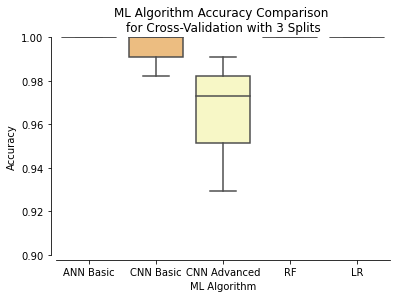

In [63]:
names = [];
for tp in models:
    names.append(tp[0]);
    
CVdf = pd.DataFrame(CV_results).T;
CVdf.columns = names;
CVdf.T

ax2 = sns.boxplot(data=CVdf, palette='Spectral')
ax2.set(xlabel = "ML Algorithm",
       ylabel = 'Accuracy',
       title = f"ML Algorithm Accuracy Comparison \nfor Cross-Validation with {N} Splits");
sns.despine(ax=ax2,offset=5, trim=False)
ax2.plot();
plt.ylim(0.90,1);

# Conclusion

With the availability of sophisticated technology such as the Muse 2, it is valuable to understand how brainwave data is impacted by the level of fatigue experienced by a person. Our study aimed to determine whether a machine learning model can accurately predict if a person is fatigued or not simply by analyzing their brainwaves.

After collecting data for both fatigued and not fatigued individuals, randomizing and scaling the data and training five different machine learning models on the dataset, our study concluded that all of our models (Artificial Neural Network, two different Convolutional Neural Network, Random Forest and Logistic Regression) were able to predict fatigued or not with an accuracy of 100% or very close to it. Although our results show our study to be surprisingly promising, it is important to note machine learning models tend to overfit smaller amounts of data input resulting in an accuracy of 100%, as is the case in our study. Due to this reason, it is difficult to compare the accuracy of one model to another. 

Future research into the correlation between brain activity and state of fatigue should aim to apply data collected over the span of many months. Furthermore, while our research focused on fatigue resulting from sleep deprivation, this can be expanded to include a wide range of both physical and mental fatigue.